### Python Notebook 2: K-means
Statistical Machine Learning Course
Dept of Statistics, University of Oxford

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Default plotting parameters
font = {'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.dpi'] = 100
# For saving the figures
svfigs = False # True if you want to save figures
svdir = './figures/' # directory to save the figures
if svfigs: # set a higher resolution if saving the figures
    plt.rcParams['figure.dpi'] = 150
else:
    plt.rcParams['figure.dpi'] = 75 

In [2]:
# Load the crabs dataset
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/crabs.csv'
crabs = pd.read_csv(url) # load it as a panda table
crabs['class'] = crabs['sp']+ crabs['sex']
crabs = crabs.drop(columns=['Unnamed: 0', 'sp', 'sex', 'index'])
# Take log
crabs[['FL', 'RW', 'CL', 'CW', 'BD']] = np.log(crabs[['FL', 'RW', 'CL', 'CW', 'BD']])

# Data matrix X
X = crabs[['FL', 'RW', 'CL', 'CW', 'BD']]
# Class y (used later on to interpret the results of the K-means)
y = crabs['class']
n, p = X.shape
print('n=' + np.str(n) + ', p='+np.str(p))
X

n=200, p=5


<ipython-input-2-26289cb52e9d>:14: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('n=' + np.str(n) + ', p='+np.str(p))


,FL,RW,CL,CW,BD
0,2.091864,1.902108,2.778819,2.944439,1.945910
1,2.174752,2.041220,2.895912,3.034953,2.001480
2,2.219203,2.054124,2.944439,3.109061,2.041220
3,2.261763,2.066863,3.000720,3.139833,2.104134
4,2.282382,2.079442,3.010621,3.135494,2.104134
...,...,...,...,...,...
195,3.063391,2.890372,3.718438,3.832980,2.928524
196,3.077312,2.839078,3.730501,3.854394,2.975530
197,3.086487,2.844909,3.751854,3.858622,2.970414
198,3.113515,2.844909,3.761200,3.885679,2.985682


<Figure size 450x300 with 0 Axes>

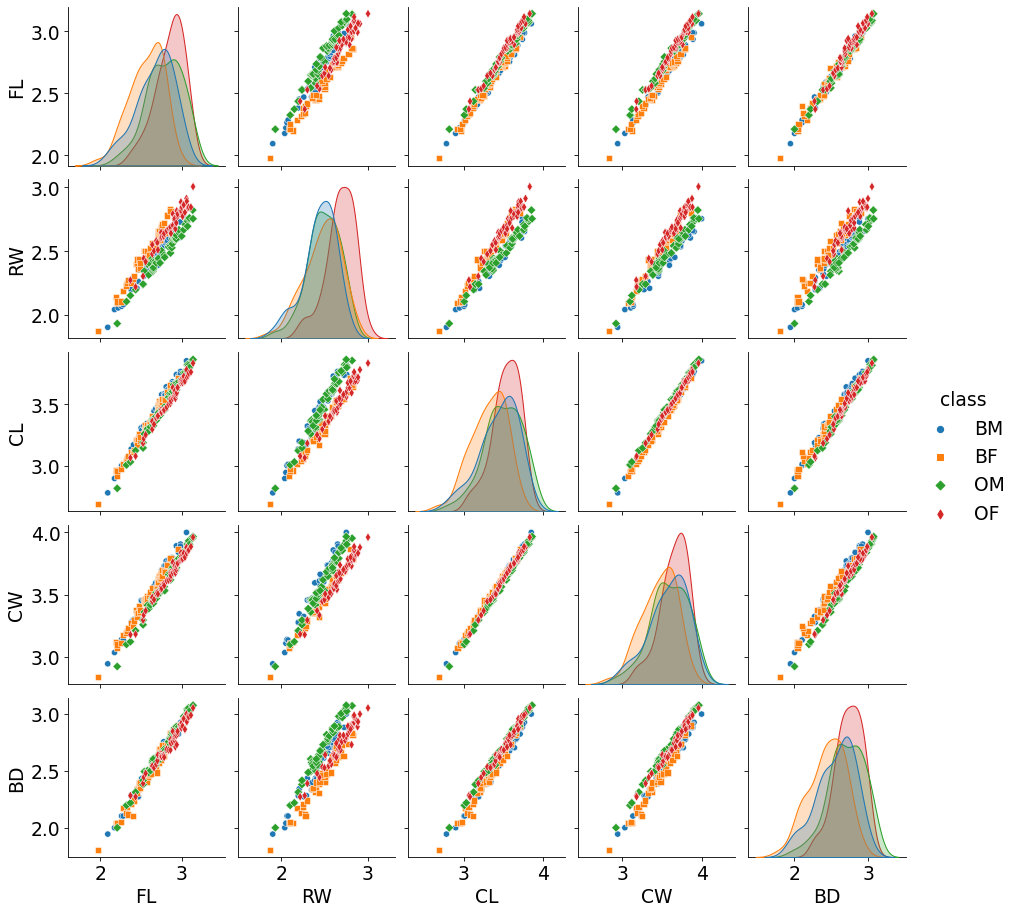

In [3]:
# Plot data with class information
plt.figure()
sns.pairplot(data=crabs, hue = 'class', markers=["o", "s", "D", "d"])
if svfigs:
    plt.savefig(svdir + 'crabslogpairplot2.png', bbox_inches = 'tight')

K-means with K=2 clusters on the raw data

In [4]:
K = 2# Number of clusters
n_init = 100 # Number of different initialisations of the Kmeans algorithm
kmeans_crabs = KMeans(n_clusters = K, init='random', n_init = n_init)
kmeans_crabs.fit(X); # run the Kmeans algorithm on the data X

In [5]:
clusters = kmeans_crabs.labels_ # Get cluster labels
crabs2 = pd.concat([X,pd.DataFrame(clusters+1, columns=['Cluster label'])], axis=1) # convert to panda frame
crabs2

,FL,RW,CL,CW,BD,Cluster label
0,2.091864,1.902108,2.778819,2.944439,1.945910,1
1,2.174752,2.041220,2.895912,3.034953,2.001480,1
2,2.219203,2.054124,2.944439,3.109061,2.041220,1
3,2.261763,2.066863,3.000720,3.139833,2.104134,1
4,2.282382,2.079442,3.010621,3.135494,2.104134,1
...,...,...,...,...,...,...
195,3.063391,2.890372,3.718438,3.832980,2.928524,2
196,3.077312,2.839078,3.730501,3.854394,2.975530,2
197,3.086487,2.844909,3.751854,3.858622,2.970414,2
198,3.113515,2.844909,3.761200,3.885679,2.985682,2


<Figure size 450x300 with 0 Axes>

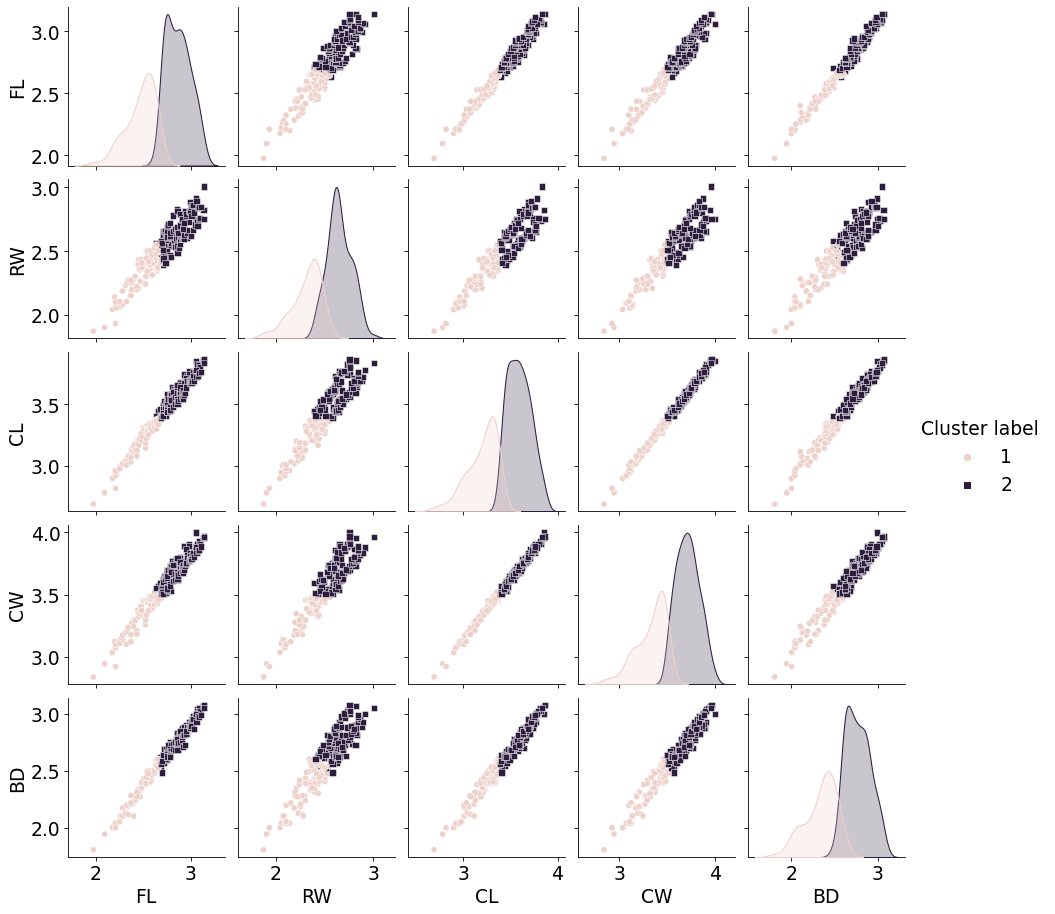

In [6]:
# Pairplot with classes
plt.figure()
sns.pairplot(data=crabs2, hue = 'Cluster label', markers=["o", "s"])
if svfigs:
    plt.savefig(svdir + 'crabslogpairplotkmeans.png', bbox_inches = 'tight')

Apply PCA to obtain the projections onto the second and third PCs

[[ 1.00000000e+00 -8.11275653e-16  1.74783177e-15]
 [-8.11275653e-16  1.00000000e+00 -2.40535249e-16]
 [ 1.74783177e-15 -2.40535249e-16  1.00000000e+00]]


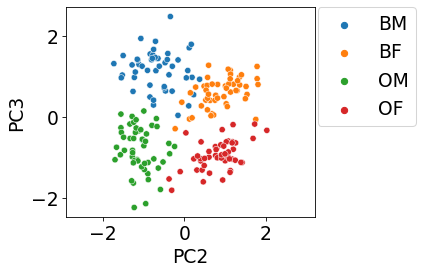

In [7]:
# Apply PCA
ncomp = 3 # Number of principal components
pca = PCA(n_components = ncomp, whiten=True)
pca.fit(X) #  estimate the parameters of the PCA
Z = pca.transform(X) # Get the projections on the PCs
print(np.cov(Z, rowvar=False)) # empirical covariance of the projections - should be the identity matrix

crabs_pca = pd.concat([pd.DataFrame(Z, columns = ['PC1', 'PC2', 'PC3']),y], axis=1)   

# plt.figure()
# sns.pairplot(data=crabs_pca, hue = 'class')

# Scatterplot of the projections, with class information
plt.figure()
sns.scatterplot(data = crabs_pca, x='PC2', y='PC3', hue = 'class', markers=["o", "s", "D", "d"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.axis('equal')
if svfigs:
    plt.savefig(svdir + 'crabslogscatterplot.png', bbox_inches = 'tight')

Run K-means with K=2 on the PCA projections

In [8]:
K = 2 # Number of clusters
kmeans_crabs_trans = KMeans(n_clusters = K, init='random', n_init = n_init)
kmeans_crabs_trans.fit(Z[:,1:3]) # run the Kmeans algorithm on the PCA projections onto the 2nd and 3rd components
clusters_trans = kmeans_crabs_trans.labels_+1
print(clusters_trans)
crabs2_trans = pd.concat([pd.DataFrame(Z,columns=['PC1','PC2','PC3']),pd.DataFrame(clusters_trans, columns=['Cluster label'])], axis=1)

[1 1 1 1 1 1 2 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


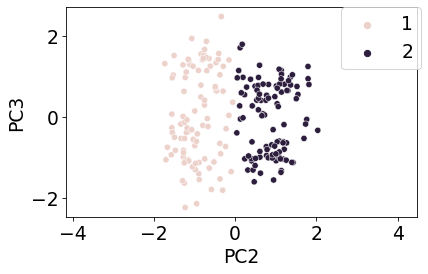

In [10]:
# Scatterplot with classes
plt.figure()
sns.scatterplot(data = crabs2_trans, x='PC2', y='PC3', hue = 'Cluster label', markers=["o", "s", "D", "d"])
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.axis('equal')
if svfigs:
    plt.savefig(svdir + 'crabslogscatterplotKmeans2.png', bbox_inches = 'tight')

Run K-means with K=4 on the PCA projections

In [11]:
K = 4 # Number of clusters
kmeans_crabs_trans = KMeans(n_clusters = K, init='random', n_init = n_init)
kmeans_crabs_trans.fit(Z[:,1:3]) # run the Kmeans algorithm on the PCA projections onto the 2nd and 3rd components
clusters_trans = kmeans_crabs_trans.labels_+1
print(clusters_trans)
crabs2_trans = pd.concat([pd.DataFrame(Z,columns=['PC1','PC2','PC3']),pd.DataFrame(clusters_trans, columns=['Cluster label'])], axis=1)

[4 2 3 3 3 3 2 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 1 4 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


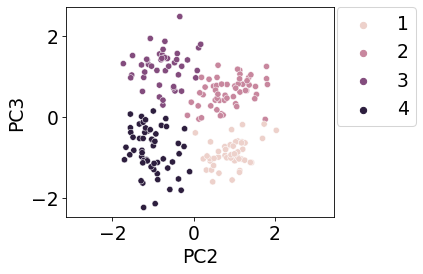

In [12]:
# Scatterplot with classes
plt.figure()
sns.scatterplot(data = crabs2_trans, x='PC2', y='PC3', hue = 'Cluster label', markers=["o", "s", "D", "d"])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.axis('equal')
if svfigs:
    plt.savefig(svdir + 'crabslogscatterplotKmeans4.png', bbox_inches = 'tight')

Choice of the number of clusters K

In [13]:
from sklearn.metrics import calinski_harabasz_score

# Compute the value of the objective function W and the CH score for the K = 1...10
Kmax = 10
W_all = np.zeros(shape=(Kmax-1))
CH = np.zeros(shape=(Kmax-1))
K_all = np.arange(2,Kmax+1)
for (i,K) in enumerate(K_all):
    kmeans_crabs = KMeans(n_clusters = K, init='random', n_init = n_init)
    kmeans_crabs.fit(Z[:,1:3]) # run the Kmeans algorithm on the PCA variables
    W_all[i] = kmeans_crabs.inertia_
    labels = kmeans_crabs.labels_
    CH[i] = calinski_harabasz_score(Z[:,1:3], labels)

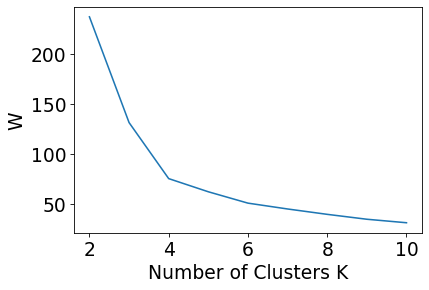

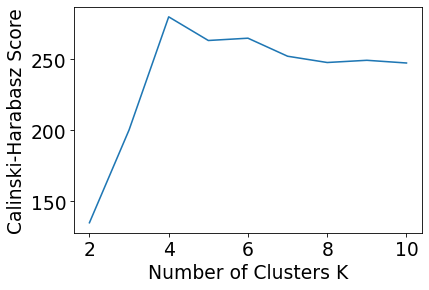

In [14]:
plt.figure()
plt.plot(K_all, W_all)
plt.xlabel('Number of Clusters K')
plt.ylabel('W')
if svfigs:
    plt.savefig(svdir + 'crabs_differentK.png', bbox_inches = 'tight')

plt.figure()
plt.plot(K_all, CH)
plt.xlabel('Number of Clusters K')
plt.ylabel('Calinski-Harabasz Score')
if svfigs:
    plt.savefig(svdir + 'crabs_CHscore.png', bbox_inches = 'tight')